In [1]:
#include <lodepng_config_cling.h>
#include <vtkm_config_cling.h>
#pragma cling add_include_path("/home/mark/Projects/vtkm-uflic/")



In [2]:
#include <vtkm/cont/DeviceAdapter.h>
#include <vtkm/cont/testing/MakeTestDataSet.h>
#include <vtkm/cont/testing/Testing.h>
#include <vtkm/rendering/Actor.h>
#include <vtkm/rendering/Mapper.h>
#include <vtkm/rendering/Scene.h>
#include <vtkm/rendering/View3D.h>
#include <vtkm/cont/ColorTable.h>
#include <vtkm/rendering/testing/RenderTest.h>
#include <vtkm/io/reader/VTKDataSetReader.h>
#include <vtkm/cont/internal/IteratorFromArrayPortal.h>
#include <vtkm/cont/ArrayPortalToIterators.h>
#include <vtkm/cont/DynamicArrayHandle.h>
#include <vtkm/cont/ArrayCopy.h>
#include <vtkm/worklet/Normalize.h>
#include <vtkm/worklet/DispatcherMapField.h>
#include "Reader.h"
#include "UFLIC.h"




Use lodepng to save out png instead of pnm so jupyter can read it.


In [3]:
#pragma cling add_include_path("/home/mark/Projects/xeus-vtkm/include/")
#include "VTKmXeusRender.h"
#include "VTKmXeusConvertPng.h"


The default vtkm::rendering::View3D render both world space annotations (think bounding measuring box) and screen space annotations (think color bar). For screen space line integral convolution, we need to remove those.

In [4]:
using VecType = vtkm::Float32;
constexpr int Size = 2;
using UFLICType = UFLIC<DoubleGyreField<VecType,Size>,VecType,Size>;
std::unique_ptr<im::image> displayImage;
VTKmXeusRender renderer;
vtkm::Int32 x,y;
x = 64; y = 32;
std::shared_ptr<Reader<VecType, Size>> reader;
reader = std::shared_ptr<ReaderCalc<VecType, Size>>(new ReaderCalc<VecType, Size>("XGC_", vtkm::Id2(x,y), Bounds(0,x,0,y), vtkm::Vec<VecType,Size>(2,1), 12));

UFLICType uflic;


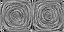

Finished dt: 0.1 cnt: 12 time: 4.31045 s
Finished dt: 0.1 cnt: 12 time: 4.28498 s


In [ ]:
[&](){
auto try_and_err = [&]() {

    uflic.do_print = true;
    for (int i=0; i<100; i++){
        auto render = [&](std::string name, auto array, vtkm::Id x, vtkm::Id y ){
            renderer.Render(array, x,y, displayImage);
        };
        uflic.callback = render;
        uflic.run(std::shared_ptr(reader));
        
    }

    //vtkm::cont::ArrayHandle<vtkm::Vec<VecType,Size>> vec;
    //vec.Allocate(x*y);
    //reader->next(vec);
    //uflic.saveQuiver(vtkm::Id2(x,y), vec);

};
try_and_err();
}();